This notebook uses DECOTA without mixup with CNV data as input data.

This uses AUROC when validating model during training and saving best model. There are 2 models, 1 trained with cell lines and 1 trained with TCGA. At evaluation, only model trained with TCGA is used. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from DecotaModel import ModelDECOTAwoMixup

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

## PACLITAXEL

In [7]:
best_parameters = {'predicted_probability_conf': 0.11253290618769825,
 'predicted_aadrc_conf': 0.2791933477018029,
 'ldr': 0.4674577686004341,
 'lr': 0.3478719420731068,
 'weight_decay': 0.053712901640683416,
 'momentum': 0.3476890657562762,
 'step_size': 90,
 'loops_warm': 90,
 'hd': 3,
 'batch_size': 32,
 'loops_train': 250,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [8]:
model_PACLITAXEL = ModelDECOTAwoMixup('PACLITAXEL', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4674577686004341, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4674577686004341, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.75,0.913262


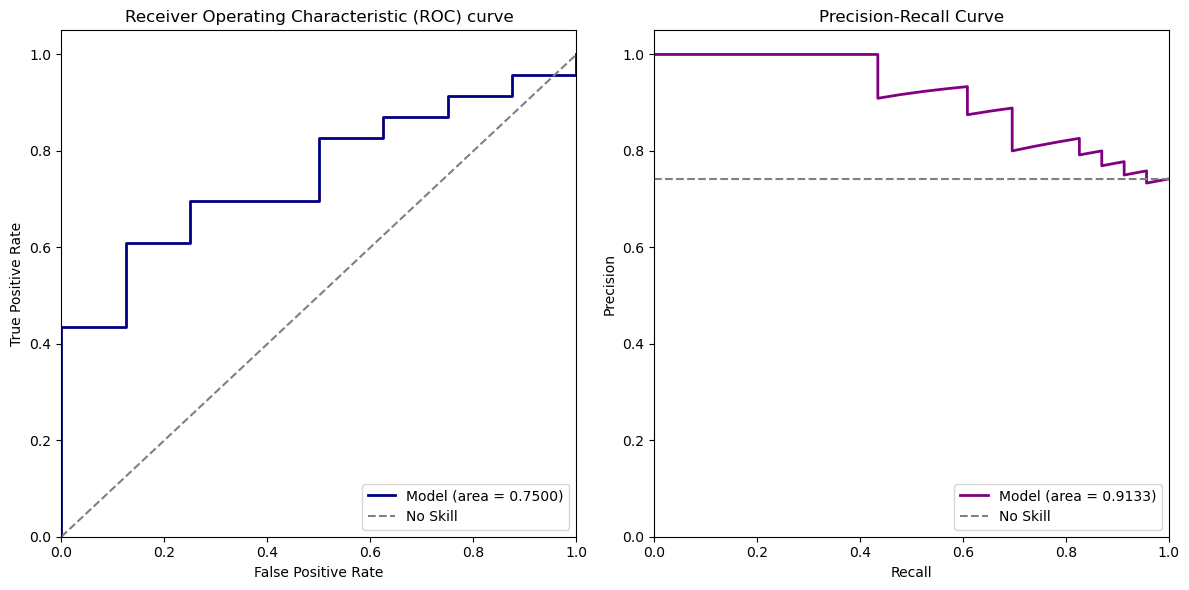

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,35,"{0: 30, 1: 5}",0.426667,0.140473
0,TCGA,82,"{1: 53, 0: 29}",0.962264,0.974201


Distribution of Predictions by Model
[0.35976711 0.87813029 0.91810203 0.93536854 0.94941282]
TP: 22, FP: 8, TN: 0, FN: 1


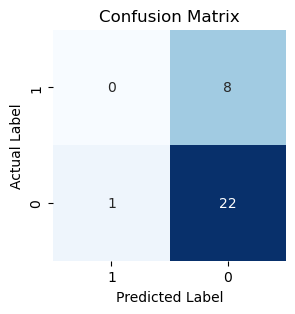

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CISPLATIN

In [12]:
best_parameters = {'predicted_probability_conf': 0.2888324499875307,
 'predicted_aadrc_conf': 0.4995121195912361,
 'ldr': 0.4262495424412191,
 'lr': 0.29020159803330897,
 'weight_decay': 0.09491251233965159,
 'momentum': 0.3598549263365567,
 'step_size': 94,
 'loops_train': 500,
 'loops_warm': 60,
 'hd': 4,
 'batch_size': 64,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [13]:
model_CISPLATIN = ModelDECOTAwoMixup('CISPLATIN', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4262495424412191, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4262495424412191, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,36,"{1: 27, 0: 9}",0.720165,0.901854


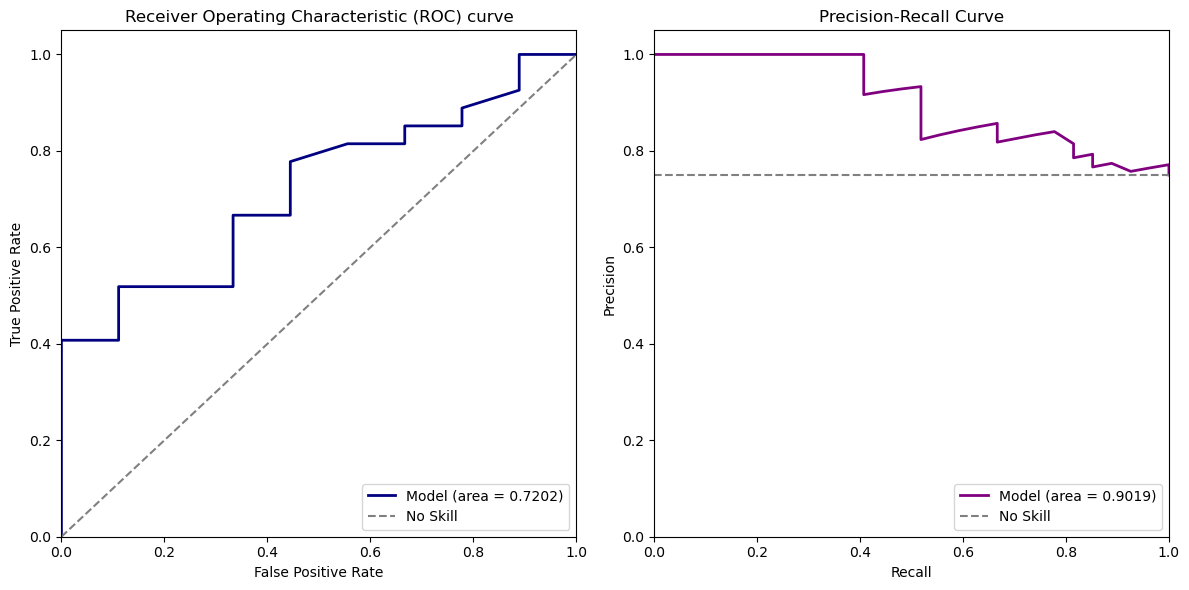

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.111731,0.586155


Distribution of Predictions by Model
[0.21608268 0.21608403 0.21608473 0.21608553 0.21609208]
TP: 0, FP: 0, TN: 9, FN: 27


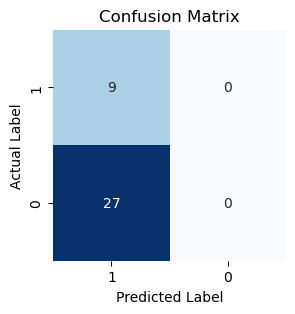

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'predicted_probability_conf': 0.4422315765704615,
 'predicted_aadrc_conf': 0.44311684597149803,
 'ldr': 0.03401865141314173,
 'lr': 0.4481034921637172,
 'weight_decay': 0.062408185212530734,
 'momentum': 0.3895347936948511,
 'step_size': 77,
 'loops_train': 250,
 'loops_warm': 80,
 'hd': 3,
 'batch_size': 64,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [18]:
model_5_FLUOROURACIL = ModelDECOTAwoMixup('5-FLUOROURACIL', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.03401865141314173, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.03401865141314173, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Re

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,21,"{1: 17, 0: 4}",0.875,0.969597


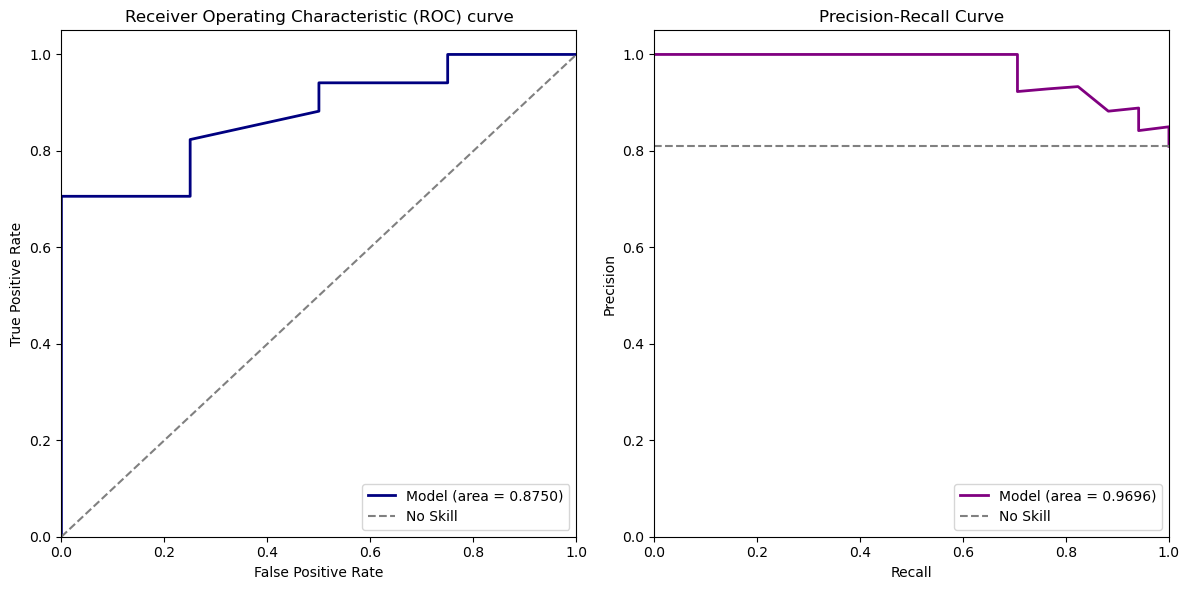

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.951282,0.94209


Distribution of Predictions by Model
[0.06616868 0.17409609 0.19807319 0.23644935 0.34676629]
TP: 0, FP: 0, TN: 4, FN: 17


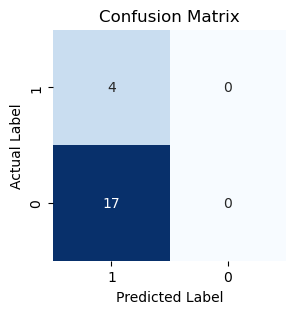

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'predicted_probability_conf': 0.19975133538246156,
 'predicted_aadrc_conf': 0.05592121243476868,
 'ldr': 0.4468936562538147,
 'lr': 0.38388643264770506,
 'weight_decay': 0.0658496630191803,
 'momentum': 0.11406017690896988,
 'step_size': 78,
 'loops_train': 300,
 'loops_warm': 60,
 'hd': 4,
 'batch_size': 32,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelDECOTAwoMixup('CYCLOPHOSPHAMIDE', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4468936562538147, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4468936562538147, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,19,"{1: 17, 0: 2}",0.823529,0.980352


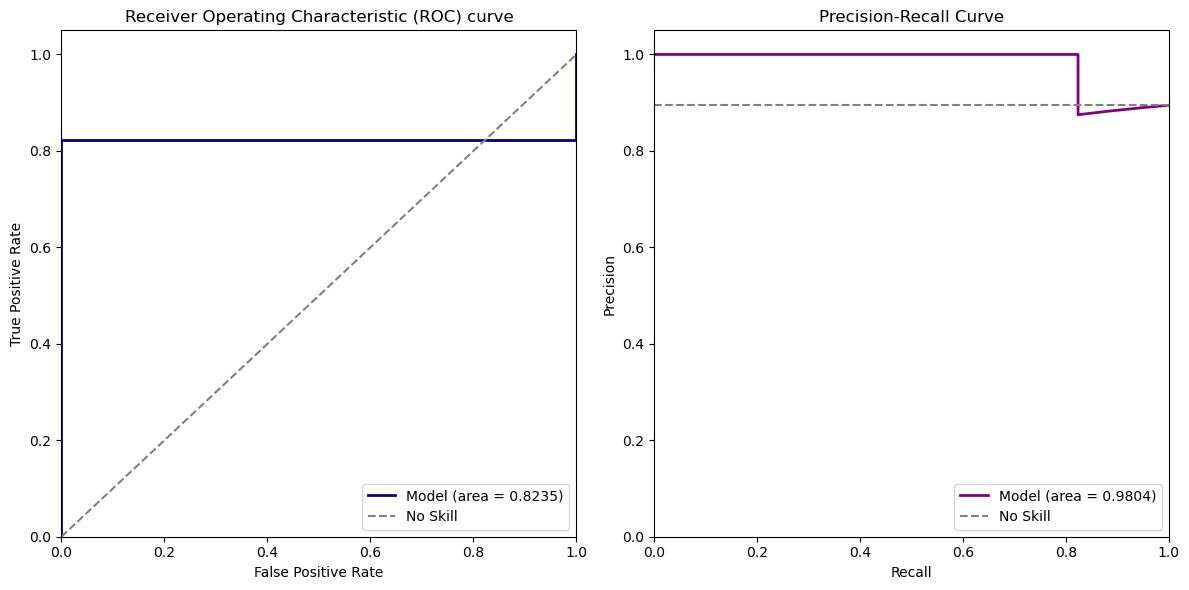

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.156028,0.858518


Distribution of Predictions by Model
[0.2697522  0.26980576 0.26983875 0.27022626 0.27114126]
TP: 0, FP: 0, TN: 2, FN: 17


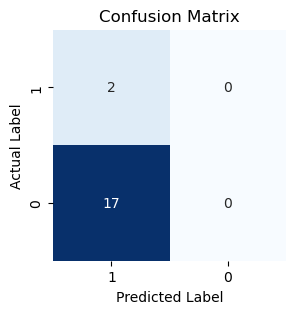

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'predicted_probability_conf': 0.1986108033730818,
 'predicted_aadrc_conf': 0.4,
 'ldr': 0.5447580109514178,
 'lr': 0.02436903052453503,
 'weight_decay': 0.04182313228385041,
 'momentum': 0.3,
 'step_size': 68,
 'loops_train': 400,
 'loops_warm': 70,
 'hd': 4,
 'batch_size': 32,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [28]:
model_GEMCITABINE = ModelDECOTAwoMixup('GEMCITABINE', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5447580109514178, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5447580109514178, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,18,"{0: 9, 1: 9}",0.753086,0.817494


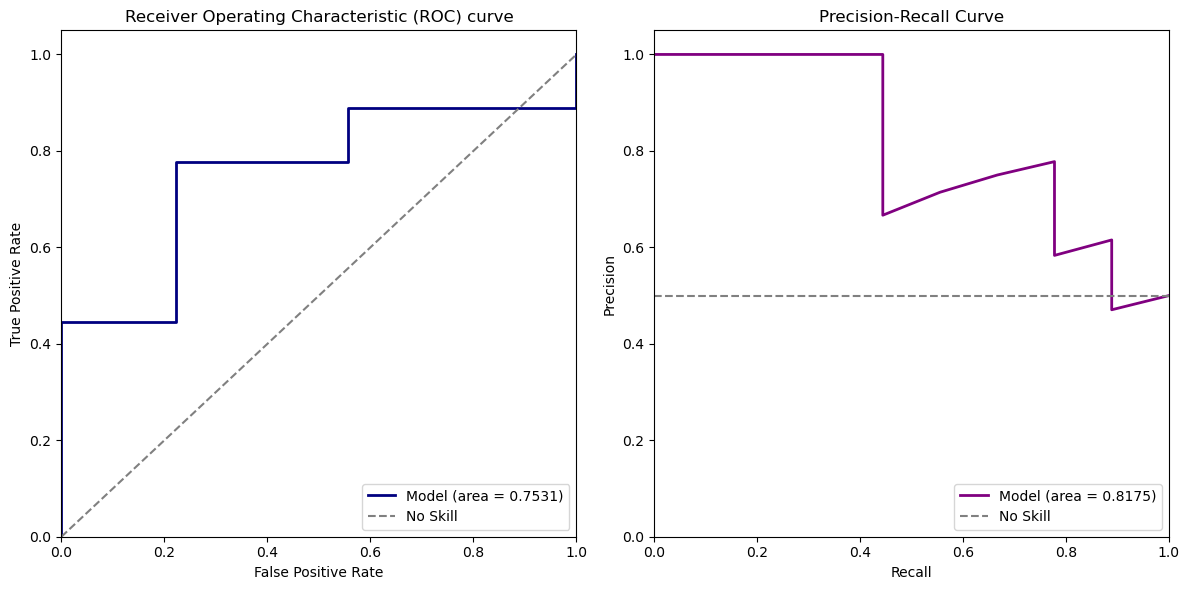

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.909586,0.939556


Distribution of Predictions by Model
[0.56709647 0.58304054 0.58526203 0.58825839 0.5913294 ]
TP: 9, FP: 9, TN: 0, FN: 0


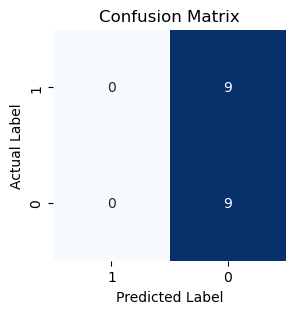

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)